In [11]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

# Check for missing values
crops.isna().sum()

# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Create a dictionary to store the model performance for each feature
feature_performance = {}

# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    
    # Calculate F1 score, the harmonic mean of precision and recall
    # Could also use balanced_accuracy_score
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = f1
    print(f"F1-score for {feature}: {f1}")

# K produced the best F1 score
# Store in best_predictive_feature dictionary
best_predictive_feature = {"K": feature_performance["K"]}
best_predictive_feature

F1-score for N: 0.09149868209906838
F1-score for P: 0.1476194290972821
F1-score for K: 0.23896974566001802
F1-score for ph: 0.0458225366614312


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

{'K': 0.23896974566001802}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


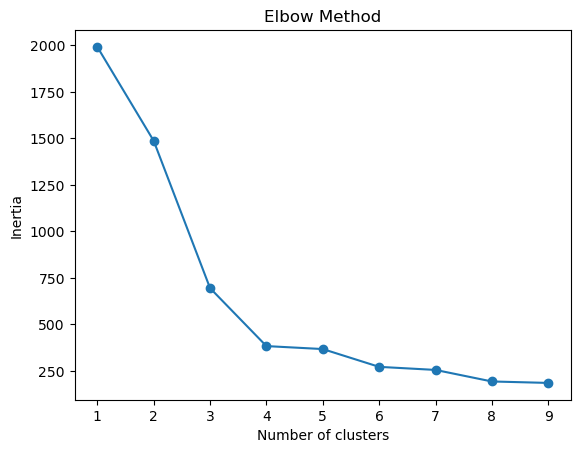

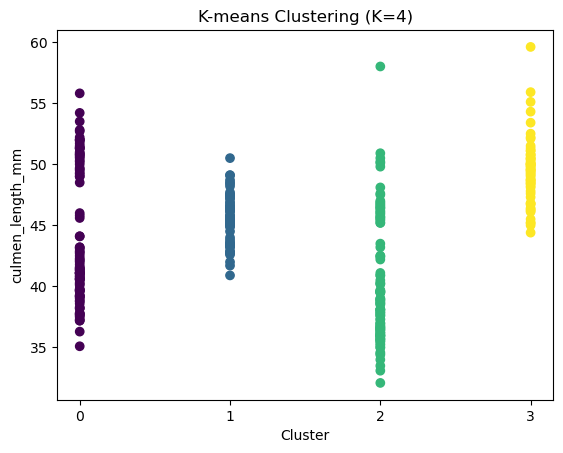

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984


In [13]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False


# Step 3 - Perform preprocessing steps on the dataset - standarizing/scaling
# Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this can increase the performance greatly (see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

# Step 4 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters 

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

OLS on Lasso‑selected features MSE:      4.812
Tuned Random Forest Regressor MSE:      2.226

Features selected by Lasso (positive coef):
['amount', 'amount_2', 'length_2']

OLS Coefficients (Lasso‑selected):
amount      0.330595
amount_2    0.029475
length_2   -0.000003
dtype: float64

Random Forest Feature Importances:
amount_2             0.379329
amount               0.314870
rental_rate          0.101126
rental_rate_2        0.099592
replacement_cost     0.026555
length               0.021561
length_2             0.021411
release_year         0.014654
deleted_scenes       0.004171
behind_the_scenes    0.003852
NC-17                0.003837
R                    0.003622
PG-13                0.003117
PG                   0.002303
dtype: float64


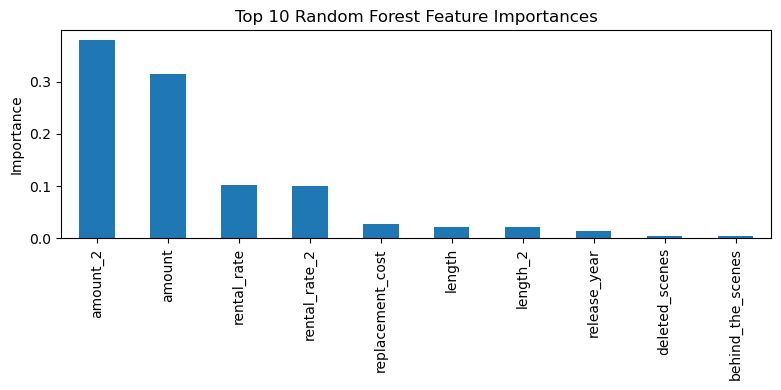

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# For lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Run OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Read in data
df_rental = pd.read_csv("rental_info.csv")

# Add information on rental duration
df_rental["rental_length"] = pd.to_datetime(df_rental["return_date"]) - pd.to_datetime(df_rental["rental_date"])
df_rental["rental_length_days"] = df_rental["rental_length"].dt.days

### Add dummy variables
# Add dummy for deleted scenes
df_rental["deleted_scenes"] =  np.where(df_rental["special_features"].str.contains("Deleted Scenes"), 1, 0)
# Add dummy for behind the scenes
df_rental["behind_the_scenes"] =  np.where(df_rental["special_features"].str.contains("Behind the Scenes"), 1, 0)

# Choose columns to drop
cols_to_drop = ["special_features", "rental_length", "rental_length_days", "rental_date", "return_date"]

# Split into feature and target sets
X = df_rental.drop(cols_to_drop, axis=1)
y = df_rental["rental_length_days"]

# Further split into training and test data
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.2, 
                                                 random_state=9)

# Create the Lasso model
lasso = Lasso(alpha=0.3, random_state=9) 

# Train the model and access the coefficients
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

# Perform feature selectino by choosing columns with positive coefficients
X_lasso_train, X_lasso_test = X_train.iloc[:, lasso_coef > 0], X_test.iloc[:, lasso_coef > 0]

# Run OLS models on lasso chosen regression
ols = LinearRegression()
ols = ols.fit(X_lasso_train, y_train)
y_test_pred = ols.predict(X_lasso_test)
mse_lin_reg_lasso = mean_squared_error(y_test, y_test_pred)

# Random forest hyperparameter space
param_dist = {'n_estimators': np.arange(1,101,1),
          'max_depth':np.arange(1,11,1)}

# Create a random forest regressor
rf = RandomForestRegressor()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions=param_dist, 
                                 cv=5, 
                                 random_state=9)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best hyper param
hyper_params = rand_search.best_params_

# Run the random forest on the chosen hyper parameters
rf = RandomForestRegressor(n_estimators=hyper_params["n_estimators"], 
                           max_depth=hyper_params["max_depth"], 
                           random_state=9)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
mse_random_forest= mean_squared_error(y_test, rf_pred)

# Random forest gives lowest MSE so:
best_model = rf
best_mse = mse_random_forest

import matplotlib.pyplot as plt

# 1) Print out MSEs for comparison
print(f"OLS on Lasso‑selected features MSE:      {mse_lin_reg_lasso:.3f}")
print(f"Tuned Random Forest Regressor MSE:      {mse_random_forest:.3f}")

# 2) List the features used by each model
lasso_features = X_train.columns[lasso_coef > 0].tolist()
print("\nFeatures selected by Lasso (positive coef):")
print(lasso_features)

# 3) OLS coefficients for those features
ols_coefs = pd.Series(ols.coef_, index=lasso_features)
print("\nOLS Coefficients (Lasso‑selected):")
print(ols_coefs.sort_values(ascending=False))

# 4) Random Forest feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances = rf_importances.sort_values(ascending=False)
print("\nRandom Forest Feature Importances:")
print(rf_importances)

# 5) Plot the top 10 RF importances
plt.figure(figsize=(8,4))
rf_importances.head(10).plot(kind='bar')
plt.title("Top 10 Random Forest Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [35]:
pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

SyntaxError: invalid syntax (312953019.py, line 1)

In [33]:
import pandas as pd
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

# Load the Chronic Kidney Disease data (ensure the file is in your working directory)
df = pd.read_csv("Chronic_Kidney_Disease.csv")

# Check number of nulls in each feature column
nulls_per_column = df.isnull().sum()
print("Null counts per column:")
print(nulls_per_column)

# Identify categorical vs. non-categorical columns
categorical_feature_mask = df.dtypes == object
categorical_columns = df.columns[categorical_feature_mask].tolist()
non_categorical_columns = df.columns[~categorical_feature_mask].tolist()

print("\nCategorical columns:")
print(categorical_columns)
print("\nNumeric columns:")
print(non_categorical_columns)

# Create a DataFrameMapper for numeric features (impute missing values with the median)
numeric_imputation_mapper = DataFrameMapper(
    [([num_feature], SimpleImputer(strategy="median")) for num_feature in non_categorical_columns],
    input_df=True,
    df_out=True
)

# Create a DataFrameMapper for categorical features (impute missing values with the most frequent value)
categorical_imputation_mapper = DataFrameMapper(
    [(cat_feature, SimpleImputer(strategy="most_frequent")) for cat_feature in categorical_columns],
    input_df=True,
    df_out=True
)

# Apply the mappers to transform the data
df_numeric_imputed = numeric_imputation_mapper.fit_transform(df)
df_categorical_imputed = categorical_imputation_mapper.fit_transform(df)

# Combine the imputed numeric and categorical data into one DataFrame
df_imputed = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)

# Display the first few rows of the resulting imputed DataFrame
print("\nImputed DataFrame:")
print(df_imputed.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd6 in position 20: invalid continuation byte